In [1]:
!pip install -Uqq fastai fastbook duckduckgo_search difPy

In [2]:
import fastbook
from fastbook import *

path = Path('categories')
print(path.resolve())

/kaggle/working/categories


In [3]:
def search_images(term, max_images=50):
    print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images))

#### Making of image dataset using duck duck go search i.e. basic scrapping for images

In [4]:
def search_n_download(searches, max_images=100, max_size=600):
    for i in searches:
        dest = (path/i)
        dest.mkdir(exist_ok=True, parents=True)
        download_images(dest, urls=search_images(f'{i} truck tyre photos', max_images))
        resize_images(path/i, max_size=max_size, dest=path/i)

In [5]:
search_n_download(['good', 'defective'])

Searching for 'good truck tyre photos'
Searching for 'defective truck tyre photos'


In [6]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

15

#### Making of DataBlock i.e. arranging the images to be used for the transfer learning purpose

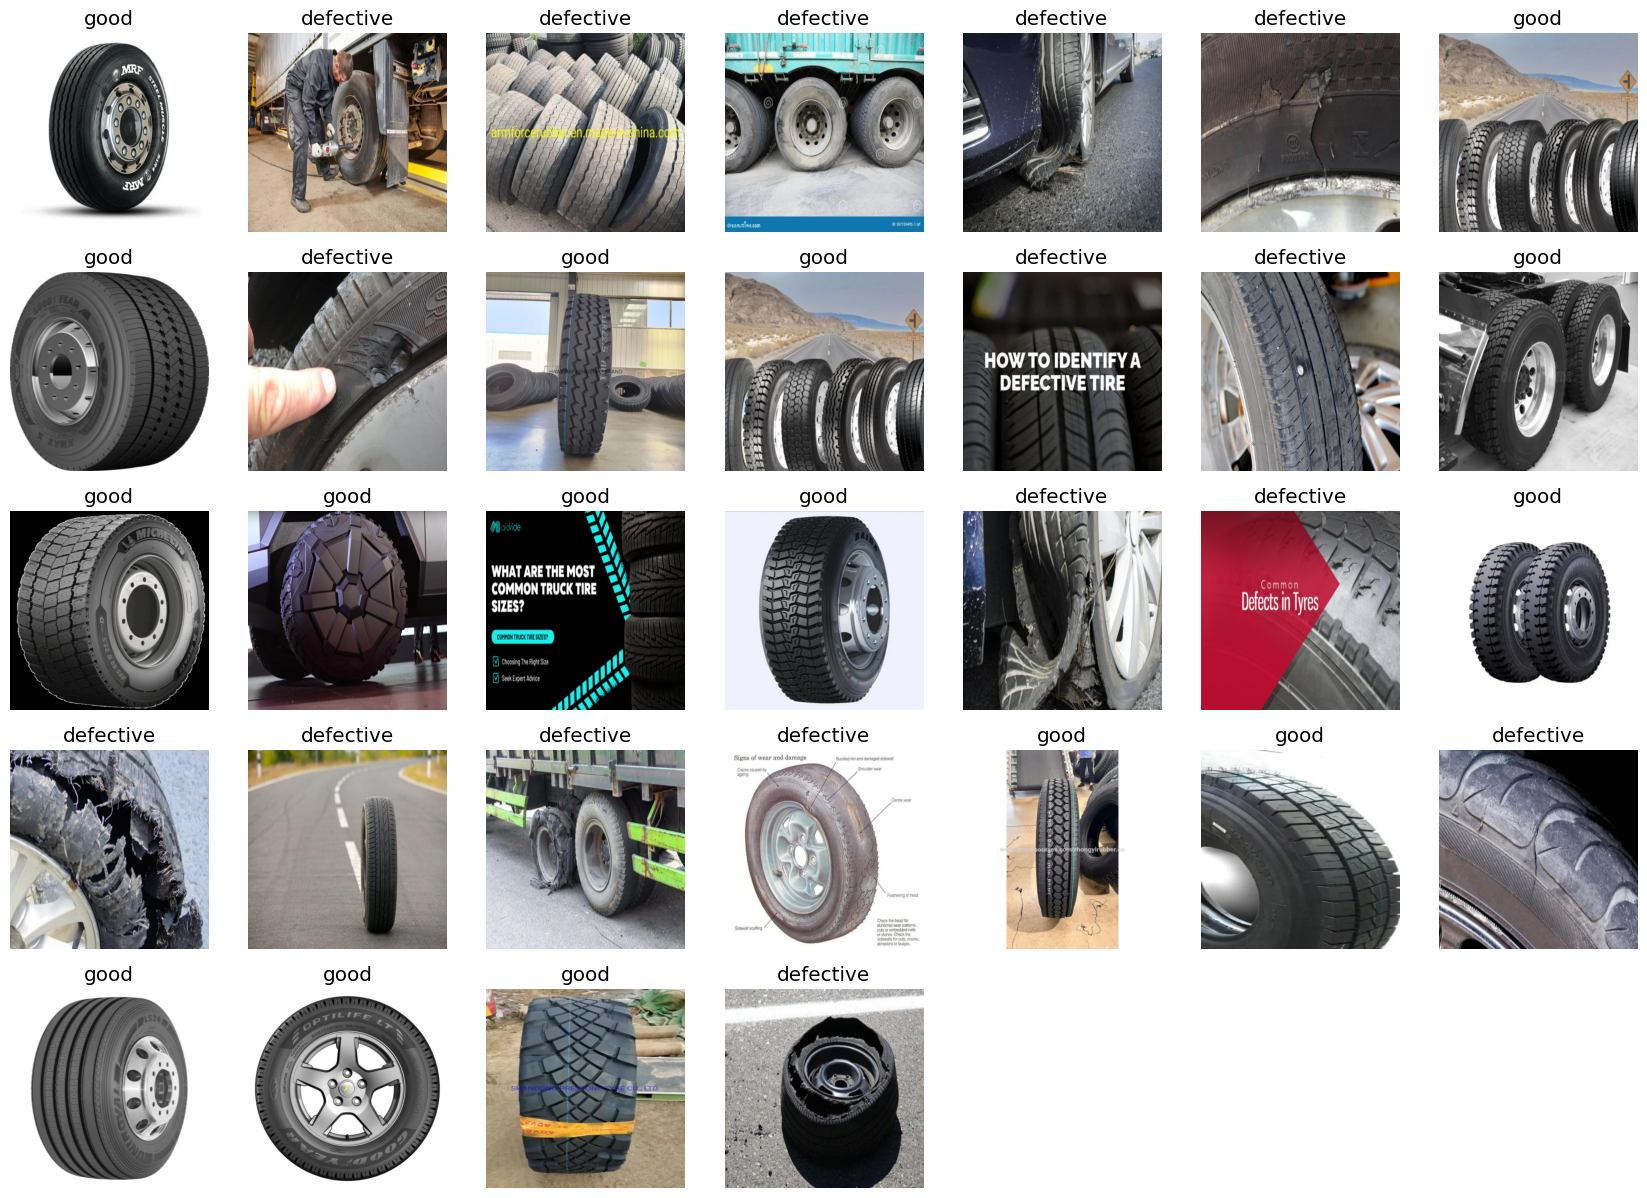

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(600, method='squish')]
).dataloaders(path, bs=32)
dls.show_batch(max_n=32)

#### Using the vision_learner function from fast.ai to fine-tune the resnet18 model which is one of the best computer vision models to be deployed on edge devices.

In [8]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.894935,0.945230,0.728571,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.326581,0.345309,0.928571,00:08
1,0.200919,0.265357,0.971429,00:08
2,0.146058,0.285371,0.942857,00:08


#### Accuracy - 94%

In [9]:
def predict(image_name):
    category, _, probs = learn.predict(PILImage.create(image_name))
    print(f"This is a {category} dumper truck tyre.")
    print(f"Probability it's a good dumper truck tyre: {probs[1]:.4f}")
    print(f"Probability it's a defective dumper truck tyre: {probs[0]:.4f}")

In [10]:
download_url('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQkDZCYJ553FwHp4s60FbipFeqXFJnZ5sxHyw&s', 'test/defective.jpg')

Path('test/defective.jpg')

#### Checking on images from the internet

This is a defective dumper truck tyre.
Probability it's a good dumper truck tyre: 0.0000
Probability it's a defective dumper truck tyre: 1.0000


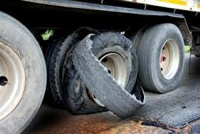

In [11]:
predict('/kaggle/working/test/defective.jpg')
Image.open('/kaggle/working/test/defective.jpg').to_thumb(200,200)

In [12]:
download_url('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbZMK7EOHRTCp2sMk-d8pdGd45O4kxvO8_UA&s', 'test/defective2.jpg')

Path('test/defective2.jpg')

This is a defective dumper truck tyre.
Probability it's a good dumper truck tyre: 0.0015
Probability it's a defective dumper truck tyre: 0.9985


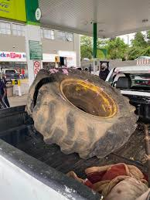

In [15]:
predict('/kaggle/working/test/defective2.jpg')
Image.open('/kaggle/working/test/defective2.jpg').to_thumb(200,200)

In [14]:
learn.export('wearntear.pkl')